### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [4]:
# Imports
!pip install statsmodels
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [5]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
print(reviews.columns)
print(reviews.shape)
print(reviews.head())
print(reviews.tail())

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'language', 'platform', 'product',
       'review', 'summary'],
      dtype='object')
(2000, 11)
   gender  age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
0    Male   18              12.30                      39             210   
1    Male   23              12.30                      81             524   
2  Female   22              13.12                       6              40   
3  Female   25              13.12                      77             562   
4  Female   33              13.94                      40             366   

  education language platform  product  \
0  graduate       EN      Web      453   
1  graduate       EN      Web      466   
2  graduate       EN      Web      254   
3  graduate       EN      Web      263   
4  graduate       EN      Web      291   

                                              review  \
0  When it comes to a 

In [6]:
# Any missing values?
print(reviews.isnull().sum())

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64


In [7]:
# Explore the data.
print(reviews.dtypes)

gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object


In [8]:
# Descriptive statistics.
print(reviews.describe())
print(reviews.info())

               age  remuneration (k£)  spending_score (1-100)  loyalty_points  \
count  2000.000000        2000.000000             2000.000000     2000.000000   
mean     39.495000          48.079060               50.000000     1578.032000   
std      13.573212          23.123984               26.094702     1283.239705   
min      17.000000          12.300000                1.000000       25.000000   
25%      29.000000          30.340000               32.000000      772.000000   
50%      38.000000          47.150000               50.000000     1276.000000   
75%      49.000000          63.960000               73.000000     1751.250000   
max      72.000000         112.340000               99.000000     6847.000000   

            product  
count   2000.000000  
mean    4320.521500  
std     3148.938839  
min      107.000000  
25%     1589.250000  
50%     3624.000000  
75%     6654.000000  
max    11086.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 199

## 2. Drop columns

In [9]:
# Drop unnecessary columns.
reviews = reviews.drop(columns=['language', 'platform'])

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'remuneration (k£)', 'spending_score (1-100)',
       'loyalty_points', 'education', 'product', 'review', 'summary'],
      dtype='object')


## 3. Rename columns

In [10]:
# Rename the column headers.
reviews = reviews.rename(columns={'remuneration (k£)': 'renumeration', 'spending_score (1-100)': 'spending_score'})

# View column names.
print(reviews.columns)

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')


## 4. Save the DataFrame as a CSV file

In [11]:
# Create a CSV file as output.
df = pd.DataFrame(reviews)
df.to_csv('reviews.csv', index=False)

In [12]:
# Import new CSV file with Pandas.
df = pd.read_csv('reviews.csv')

# View DataFrame.
print(df.columns)
print(df.shape)
print(df.head())
print(df.tail())

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

## 5. Linear regression

### 5a) spending vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.92e-263
Time:                        22:21:28   Log-Likelihood:                -8759.4
No. Observations:                2000   AIC:                         1.752e+04
Df Residuals:                    1998   BIC:                         1.753e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.4260      0.685     41.504      0.000      27.083      29.769
x              0.0137      0.000     40.595      0.000       0.013       0.014
==============================================================================
Omnibus:                      169.397   Durbin-Watson:                   2.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.607
Skew:                           0.768   Prob(JB):                     6.81e-47
Kurtosis:                       3.441   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

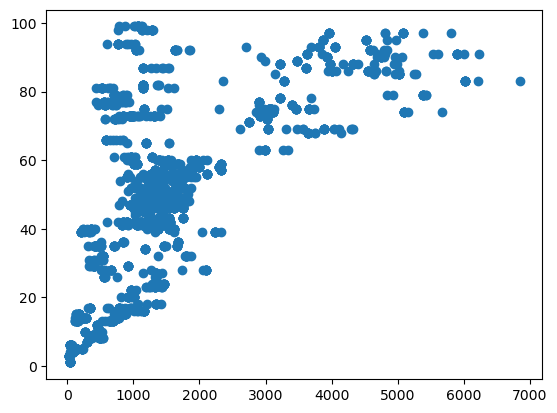

In [13]:
df.corr()
# Independent variable.
y = df['spending_score'] 

# Dependent variable.
x = df['loyalty_points']

# OLS model and summary.
plt.scatter(x, y)
f = 'y ~ x'
test = ols(f, data = df).fit()
test.summary()

In [14]:
# Extract the estimated parameters.
print("Parameters: ", test.params) 

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    28.426033
x             0.013671
dtype: float64
Standard errors:  Intercept    0.684905
x            0.000337
dtype: float64
Predicted values:  [ 31.29703545  35.58986696  28.97289101 ... 105.17748592  42.75370042
  34.97465225]


In [15]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (28.4260) + 0.0137 * df['loyalty_points']

# View the output.
y_pred

0        31.3030
1        35.6048
2        28.9740
3        36.1254
4        33.4402
          ...   
1995     83.6507
1996     35.8103
1997    105.3378
1998     42.7836
1999     34.9883
Name: loyalty_points, Length: 2000, dtype: float64

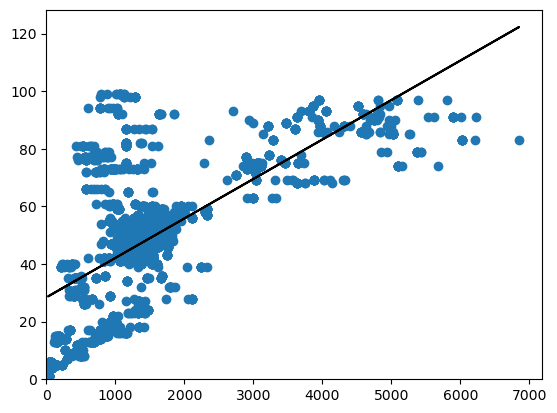

In [16]:
# Plot the graph with a regression line.
plt.scatter(x, y)

# Plot the regression line (in black).
plt.plot(x, y_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5b) renumeration vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      q   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          2.43e-209
Time:                        22:21:28   Log-Likelihood:                -8641.8
No. Observations:                2000   AIC:                         1.729e+04
Df Residuals:                    1998   BIC:                         1.730e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5606      0.646     47.321      0.000      29.294      31.827
p              0.0111      0.000     34.960      0.000       0.010       0.012
==============================================================================
Omnibus:                      382.801   Durbin-Watson:                   1.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              657.257
Skew:                           1.230   Prob(JB):                    1.90e-143
Kurtosis:                       4.357   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

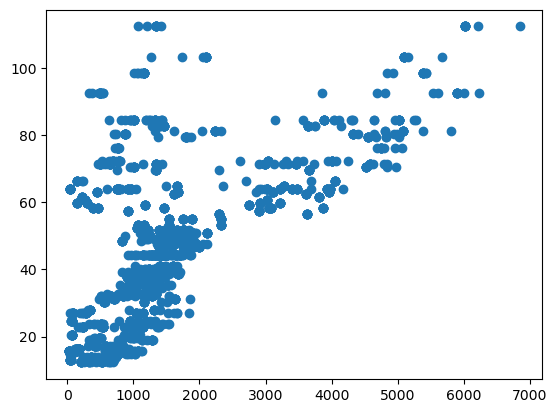

In [17]:
# Independent variable.
q = df['renumeration'] 

# Dependent variable.
p = df['loyalty_points']

# OLS model and summary.
plt.scatter(p, q)
e = 'q ~ p'
test_1 = ols(e, data = df).fit()
test_1.summary()

In [18]:
# Extract the estimated parameters.
print("Parameters: ", test_1.params) 

# Extract the standard errors.
print("Standard errors: ", test_1.bse)  

# Extract the predicted values.
print("Predicted values: ", test_1.predict())

Parameters:  Intercept    30.560555
p             0.011101
dtype: float64
Standard errors:  Intercept    0.645817
p            0.000318
dtype: float64
Predicted values:  [32.89186761 36.3777352  31.00461446 ... 92.88431491 42.19491551
 35.87816819]


In [19]:
# Set the the X coefficient and the constant to generate the regression table.
q_pred = (30.5606) + 0.0111 * df['loyalty_points']

# View the output.
q_pred

0       32.8916
1       36.3770
2       31.0046
3       36.7988
4       34.6232
         ...   
1995    75.3047
1996    36.5435
1997    92.8760
1998    42.1934
1999    35.8775
Name: loyalty_points, Length: 2000, dtype: float64

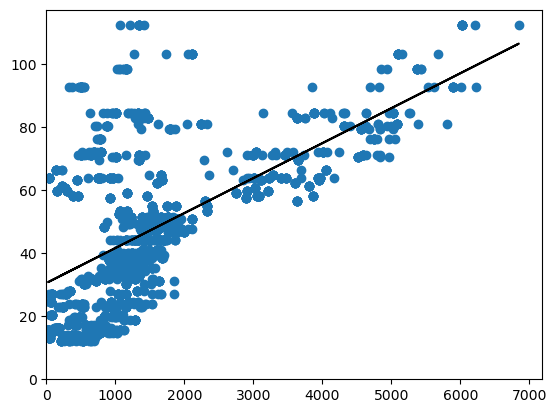

In [20]:
# Plot graph with regression line.
plt.scatter(p, q)

# Plot the regression line (in black).
plt.plot(p, q_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

### 5c) age vs loyalty

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      t   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Wed, 04 Oct 2023   Prob (F-statistic):             0.0577
Time:                        22:21:28   Log-Likelihood:                -8051.8
No. Observations:                2000   AIC:                         1.611e+04
Df Residuals:                    1998   BIC:                         1.612e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.2035      0.481     83.615      0.000      39.261      41.146
s             -0.0004      0.000     -1.899      0.058      -0.001    1.47e-05
==============================================================================
Omnibus:                       99.357   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.564
Skew:                           0.574   Prob(JB):                     3.61e-25
Kurtosis:                       2.814   Cond. No.                     3.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

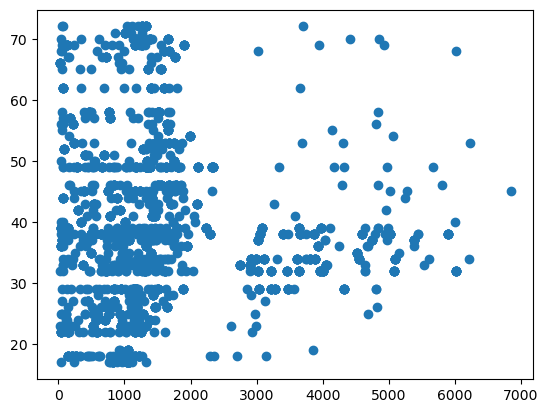

In [21]:
# Independent variable.
t = df['age'] 

# Dependent variable.
s = df['loyalty_points']

# OLS model and summary.
plt.scatter(s, t)
d = 't ~ s'
test_2 = ols(d, data = df).fit()
test_2.summary()

In [22]:
# Extract the estimated parameters.
print("Parameters: ", test_2.params) 

# Extract the standard errors.
print("Standard errors: ", test_2.bse)  

# Extract the predicted values.
print("Predicted values: ", test_2.predict())


Parameters:  Intercept    40.203457
s            -0.000449
dtype: float64
Standard errors:  Intercept    0.480816
s            0.000236
dtype: float64
Predicted values:  [40.10917768 39.96820745 40.18549915 ... 37.683053   39.73295776
 39.98841019]


In [23]:
# Set the X coefficient and the constant to generate the regression table.
t_pred = (40.2035) - 0.0004 * df['loyalty_points']

# View the output.
t_pred

0       40.1195
1       39.9939
2       40.1875
3       39.9787
4       40.0571
         ...   
1995    38.5911
1996    39.9879
1997    37.9579
1998    39.7843
1999    40.0119
Name: loyalty_points, Length: 2000, dtype: float64

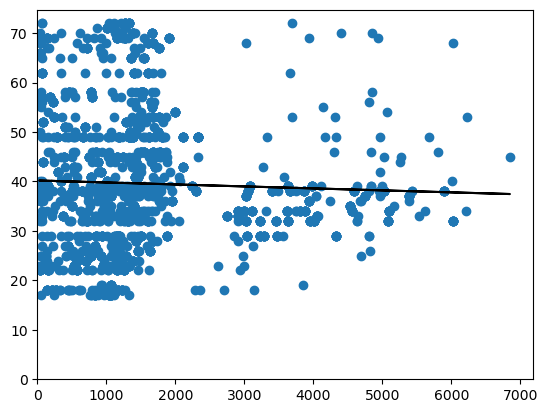

In [24]:
# Plot graph with regression line.
plt.scatter(s, t)

# Plot the regression line (in black).
plt.plot(s, t_pred, color='black')

# Set the x and y limits on the axes.
plt.xlim(0)
plt.ylim(0)

# View the plot.
plt.show()

## 6. Observations and insights

***Your observations here...***






# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [25]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [26]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
print(df2.columns)
print(df2.shape)
print(df2.head())
print(df2.tail())


Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

In [27]:
# Drop unnecessary columns.


# View DataFrame.


In [28]:
# Explore the data.
print(df2.dtypes)

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [29]:
# Descriptive statistics.
print(df2.describe())
print(df2.info())

               age  renumeration  spending_score  loyalty_points       product
count  2000.000000   2000.000000     2000.000000     2000.000000   2000.000000
mean     39.495000     48.079060       50.000000     1578.032000   4320.521500
std      13.573212     23.123984       26.094702     1283.239705   3148.938839
min      17.000000     12.300000        1.000000       25.000000    107.000000
25%      29.000000     30.340000       32.000000      772.000000   1589.250000
50%      38.000000     47.150000       50.000000     1276.000000   3624.000000
75%      49.000000     63.960000       73.000000     1751.250000   6654.000000
max      72.000000    112.340000       99.000000     6847.000000  11086.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2 

## 2. Plot

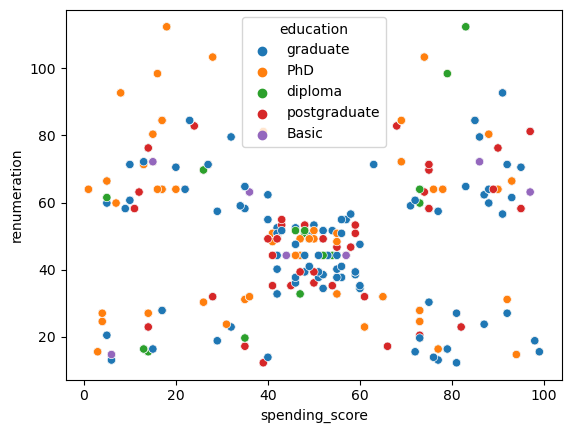

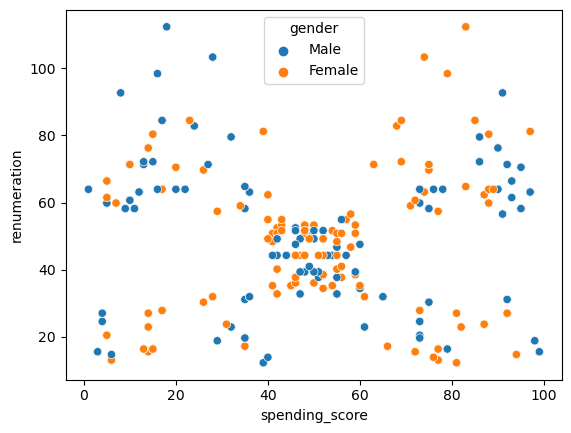

In [30]:
# Create a scatterplot with Seaborn.

Scatt_Edu = sns.scatterplot(data=df2, x="spending_score", y="renumeration", hue='education')
plt.show(Scatt_Edu)
Scatt_Gen = sns.scatterplot(data=df2, x="spending_score", y="renumeration", hue='gender')
plt.show(Scatt_Gen)

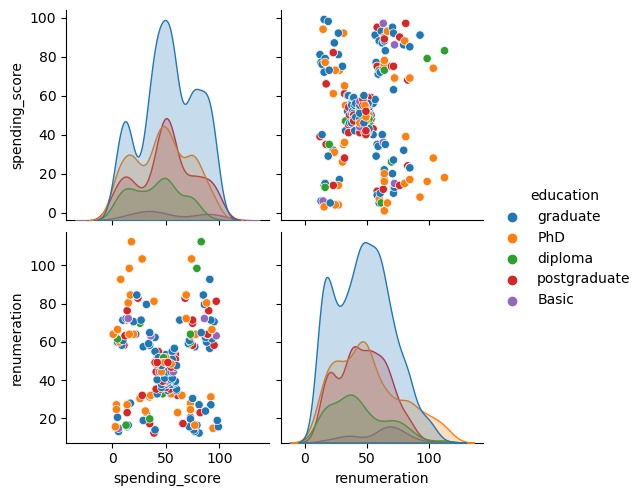

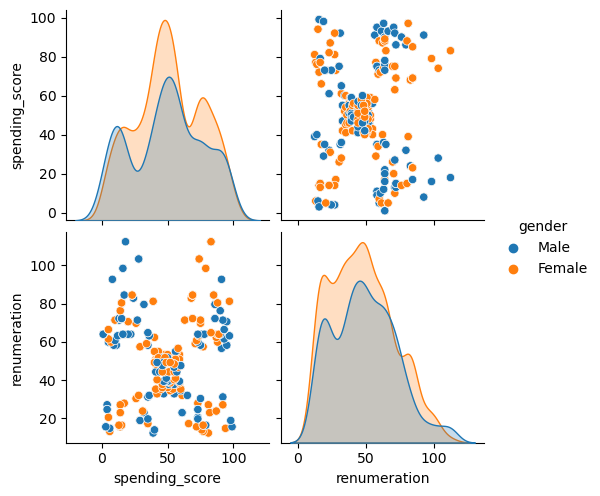

In [31]:
# Create a pairplot with Seaborn.
x = df2[["spending_score", "renumeration"]]
Pair_Edu = sns.pairplot(data=df2,  vars=x, hue='education')
plt.show(Pair_Edu)
Pair_Gen = sns.pairplot(data=df2,  vars=x, hue='gender')
plt.show(Pair_Gen)

## 3. Elbow and silhoutte methods

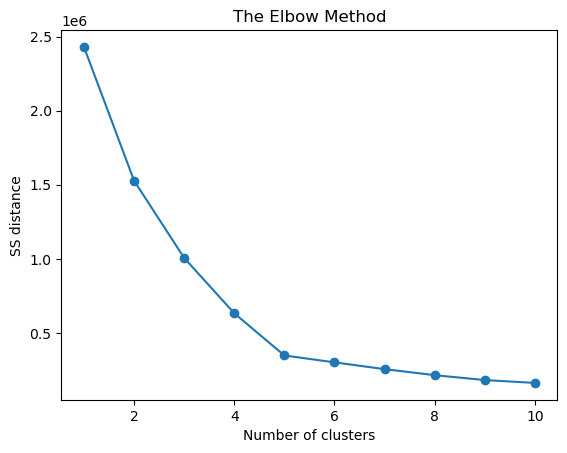

In [32]:
# Determine the number of clusters: Elbow method.

# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11),
         ss,
         marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS distance")

plt.show()

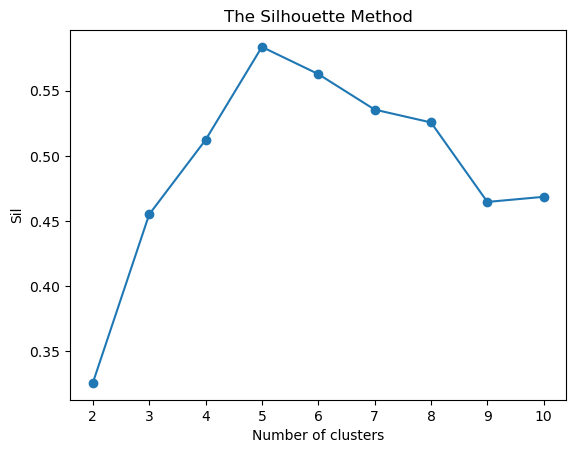

In [33]:
# Determine the number of clusters: Silhouette method.

# Find the range of clusters to be used using silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  1
2               6         13.12                  1
3              77         13.12                  1
4              40         13.94                  1


1    1293
2     356
0     351
Name: K-Means Predicted, dtype: int64

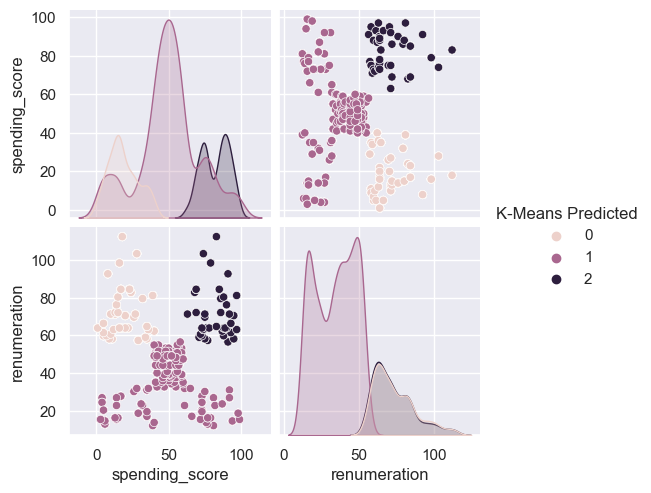

In [73]:
# Use three clusters.
kmeans = KMeans(n_clusters = 3, 
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_

x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

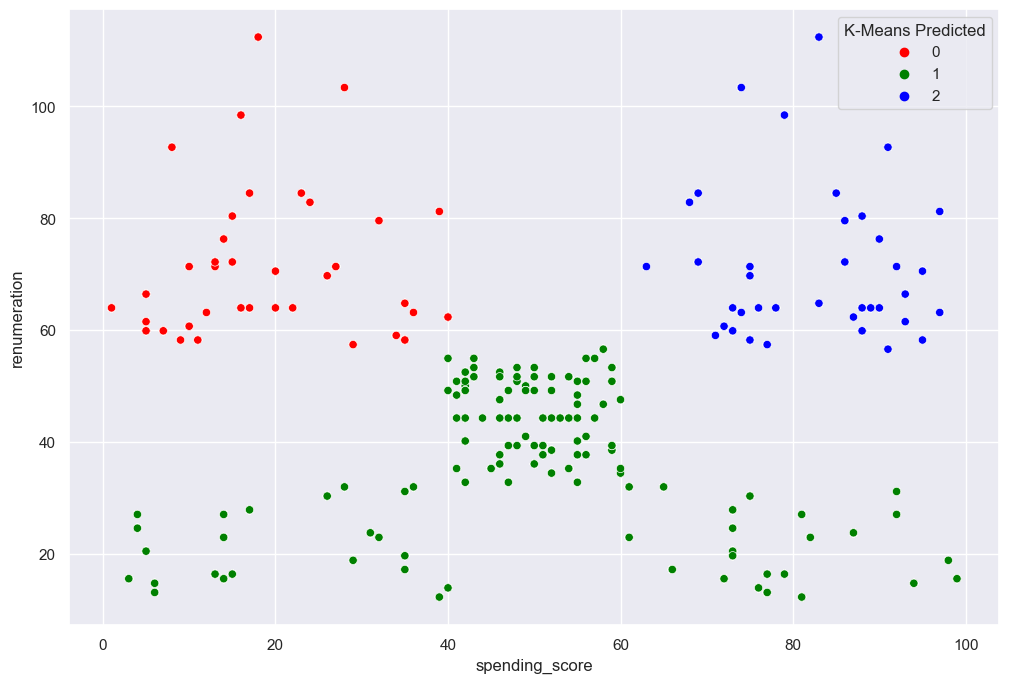

In [74]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  0
2               6         13.12                  1
3              77         13.12                  0
4              40         13.94                  1


0    1013
3     356
2     351
1     280
Name: K-Means Predicted, dtype: int64

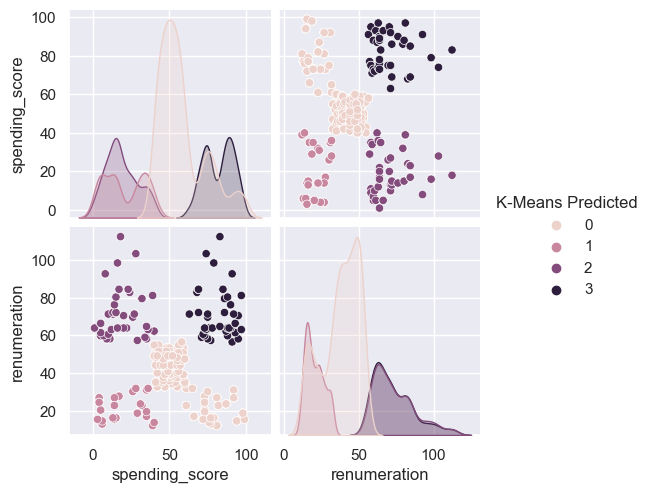

In [75]:
# Use four clusters.
kmeans_1 = KMeans(n_clusters=4,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_1 = kmeans_1.labels_

x['K-Means Predicted'] = clusters_1
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

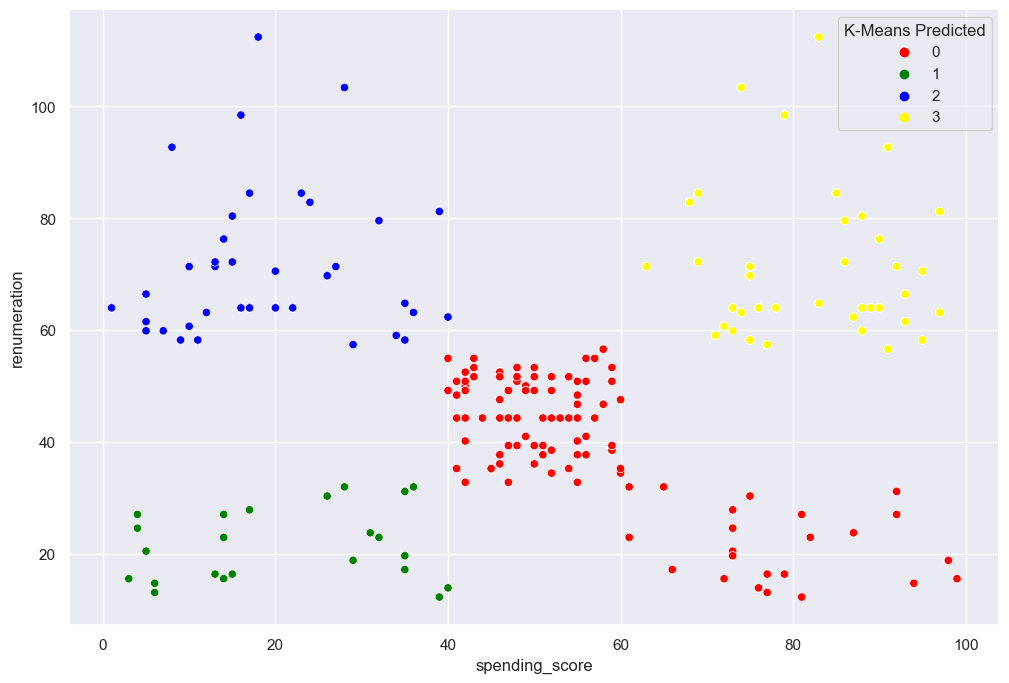

In [76]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  1
1              81         12.30                  4
2               6         13.12                  1
3              77         13.12                  4
4              40         13.94                  1


0    774
3    356
2    330
1    271
4    269
Name: K-Means Predicted, dtype: int64

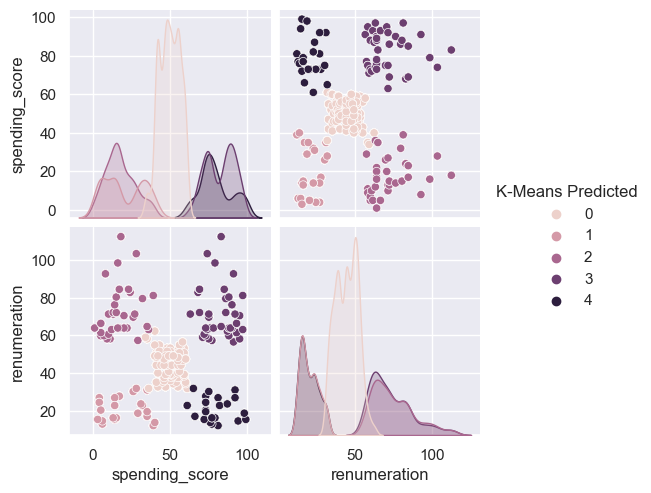

In [77]:
# Use five clusters.
kmeans_2 = KMeans(n_clusters=5,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_2 = kmeans_2.labels_

x['K-Means Predicted'] = clusters_2
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

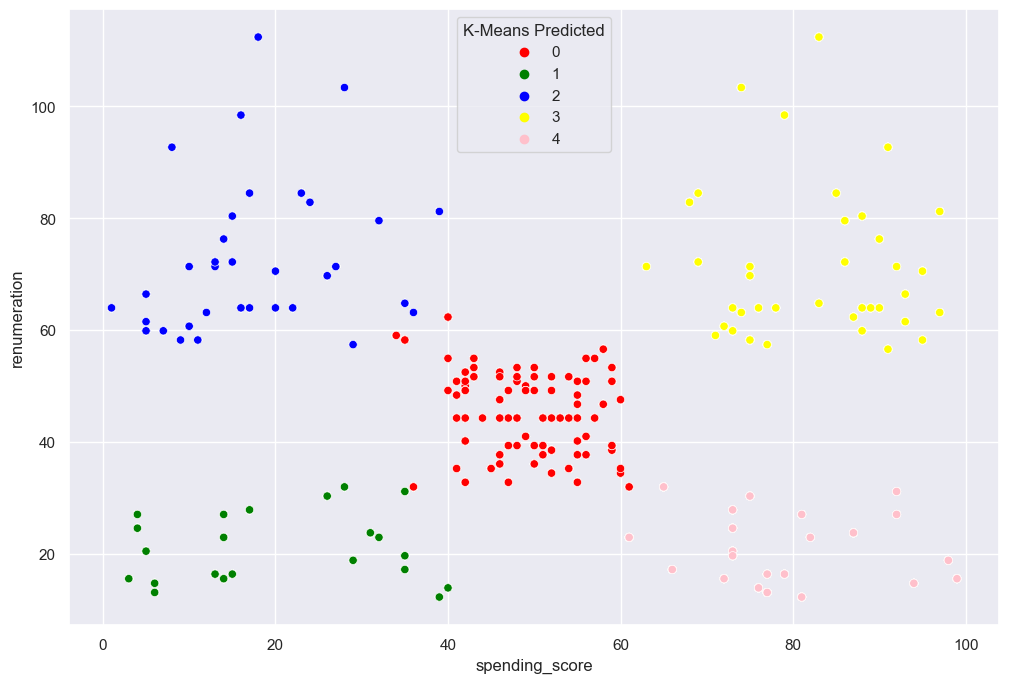

In [78]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  5
2               6         13.12                  3
3              77         13.12                  5
4              40         13.94                  3


0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

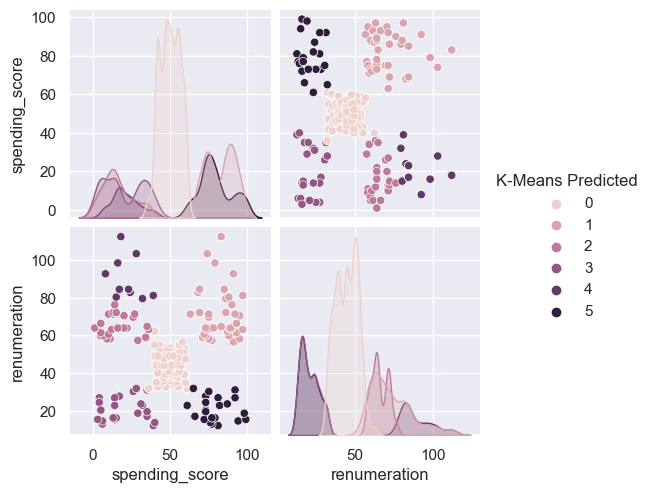

In [79]:
# Use six clusters.
kmeans_3 = KMeans(n_clusters=6,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_3 = kmeans_3.labels_

x['K-Means Predicted'] = clusters_3
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

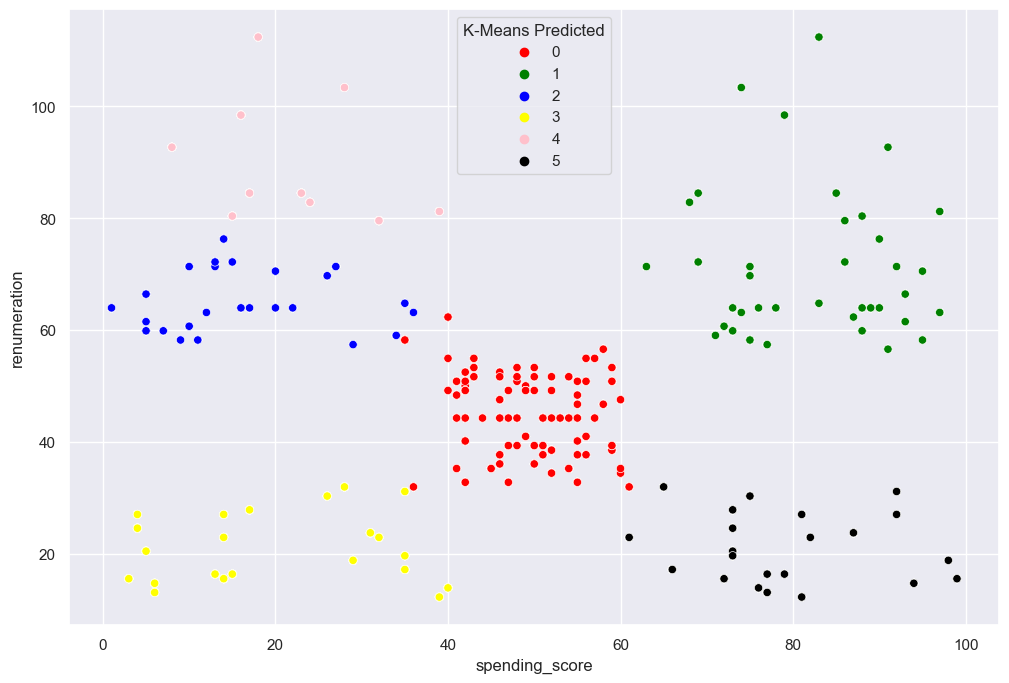

In [66]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  3
1              81         12.30                  6
2               6         13.12                  3
3              77         13.12                  6
4              40         13.94                  3


2    767
3    271
4    271
6    269
1    214
5    123
0     85
Name: K-Means Predicted, dtype: int64

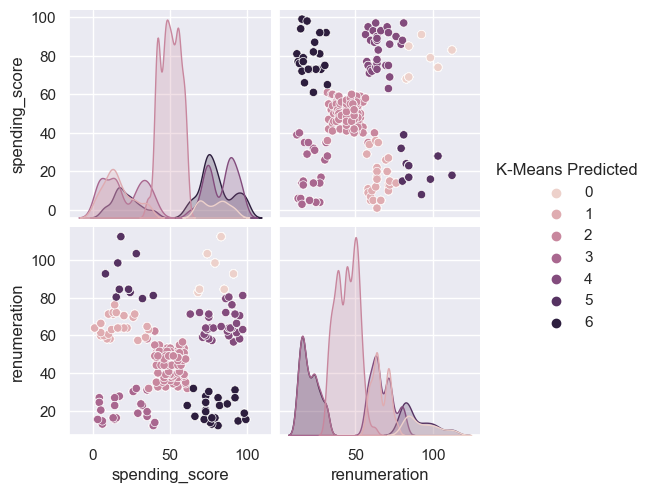

In [80]:
# Use seven clusters.
kmeans_4 = KMeans(n_clusters=7,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_4 = kmeans_4.labels_

x['K-Means Predicted'] = clusters_4
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

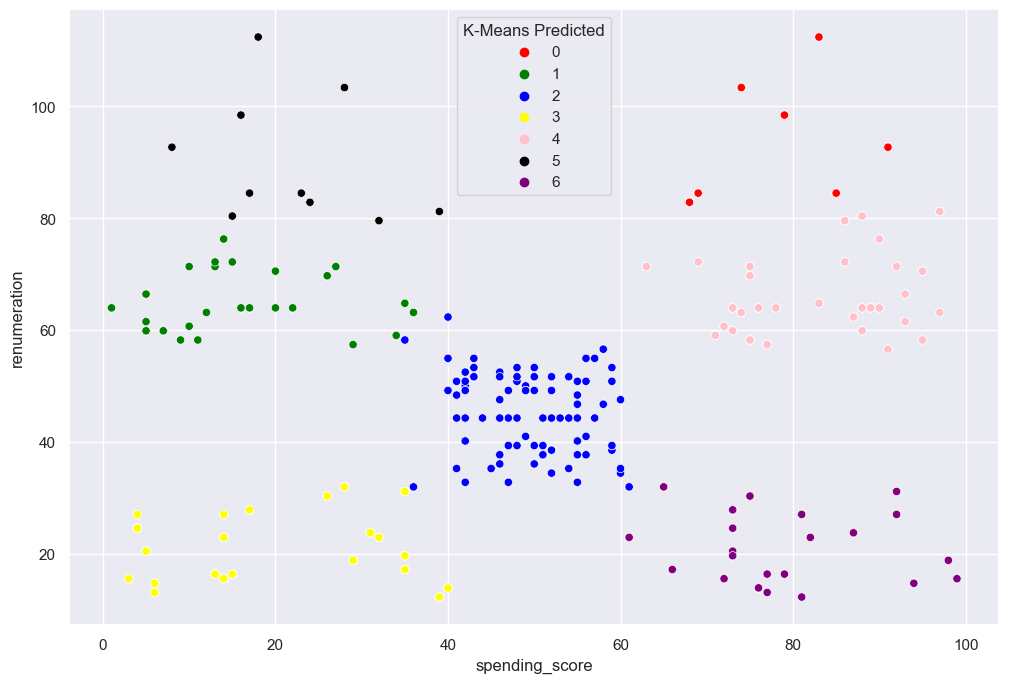

In [81]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  0
1              81         12.30                  5
2               6         13.12                  6
3              77         13.12                  5
4              40         13.94                  0


7    395
1    378
4    356
5    246
2    192
0    156
6    154
3    123
Name: K-Means Predicted, dtype: int64

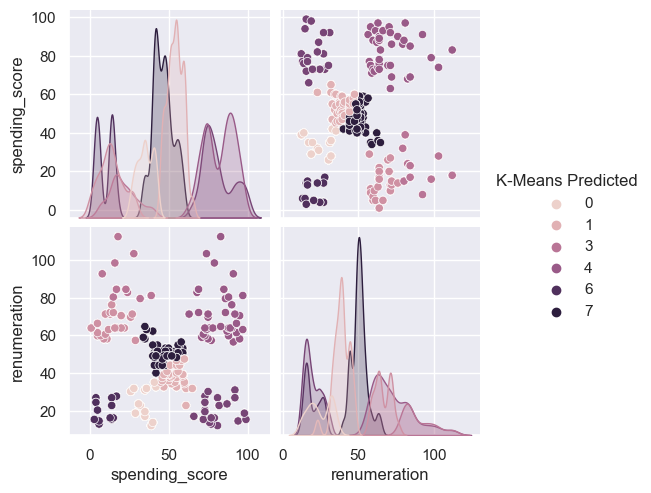

In [86]:
# Use eight clusters.
kmeans_5 = KMeans(n_clusters=8,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_5 = kmeans_5.labels_

x['K-Means Predicted'] = clusters_5
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

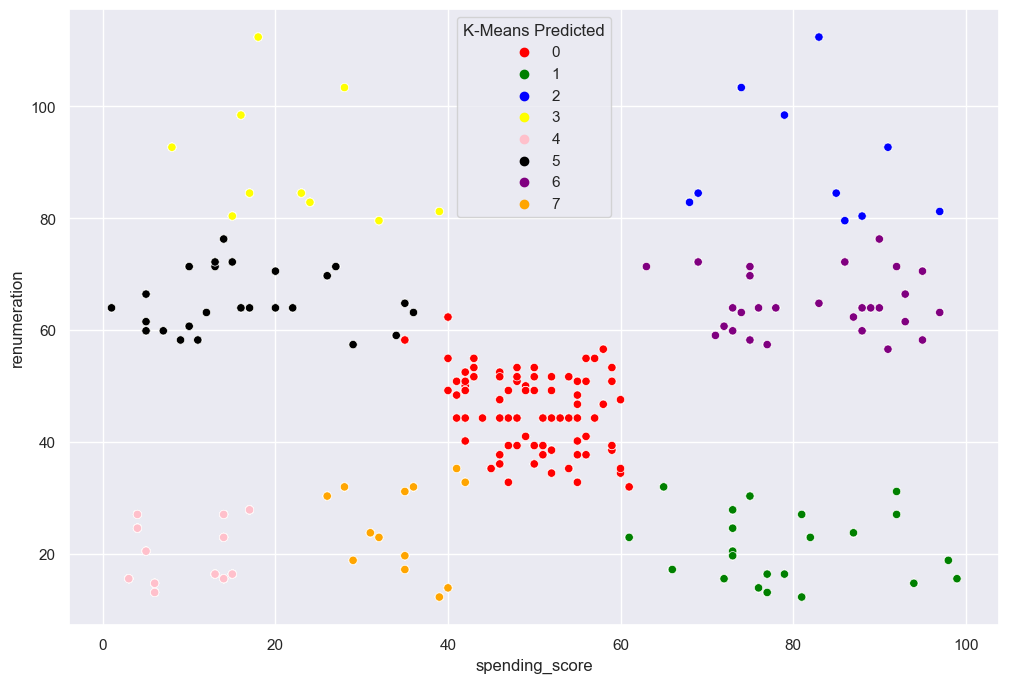

In [83]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  6
1              81         12.30                  4
2               6         13.12                  0
3              77         13.12                  4
4              40         13.94                  6


1    395
8    378
4    246
5    238
7    192
6    156
0    154
2    123
3    118
Name: K-Means Predicted, dtype: int64

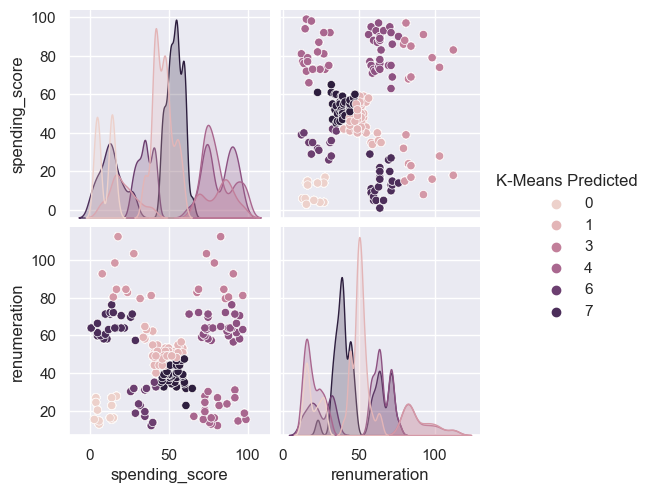

In [84]:
# Use nine clusters.
kmeans_6 = KMeans(n_clusters=9,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_6 = kmeans_6.labels_

x['K-Means Predicted'] = clusters_6
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

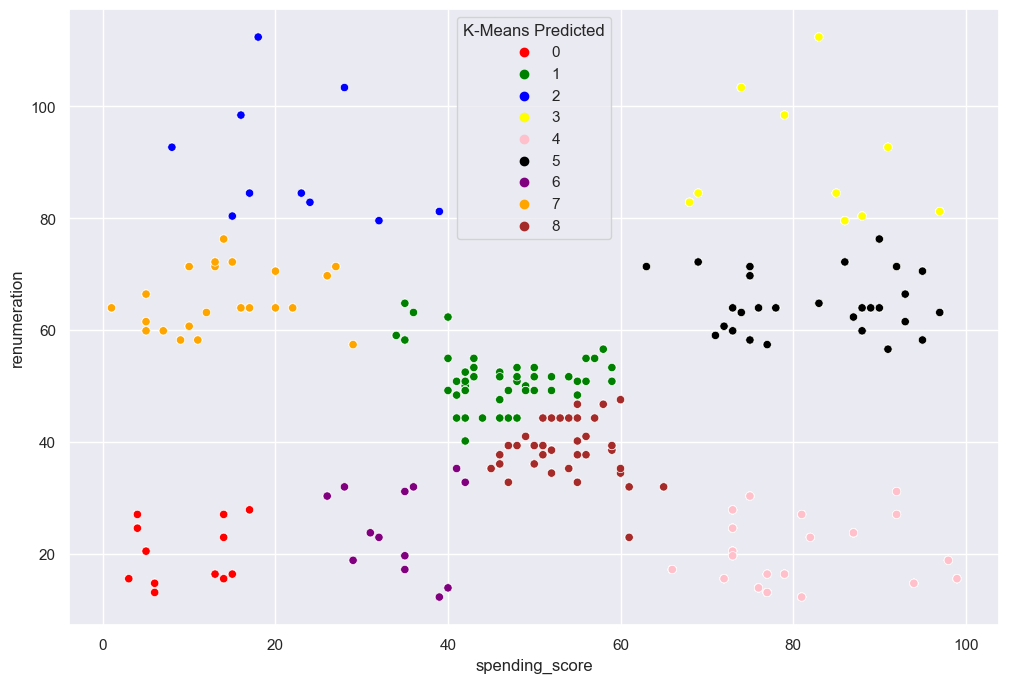

In [85]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange', 'brown'])

   spending_score  renumeration  K-Means Predicted
0              39         12.30                  9
1              81         12.30                  3
2               6         13.12                  1
3              77         13.12                  3
4              40         13.94                  9


5    395
0    365
4    238
2    192
3    186
9    156
1    154
7    123
8    118
6     73
Name: K-Means Predicted, dtype: int64

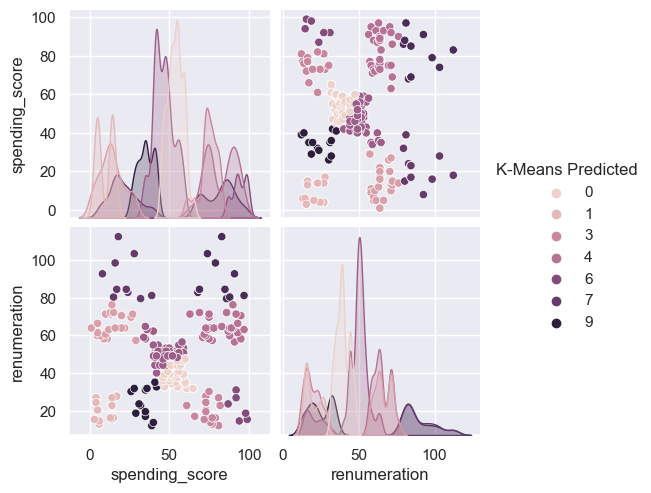

In [87]:
# Use ten clusters.
kmeans_7 = KMeans(n_clusters=10,
                max_iter=15000,
                init='k-means++',
                random_state=0).fit(x)

clusters_7 = kmeans_7.labels_

x['K-Means Predicted'] = clusters_7
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()
# View the K-Means predicted.
print(x.head())
# Visualising the clusters.
# Set plot size.
sns.set(rc = {'figure.figsize':(12, 8)})
x['K-Means Predicted'].value_counts()

<AxesSubplot:xlabel='spending_score', ylabel='renumeration'>

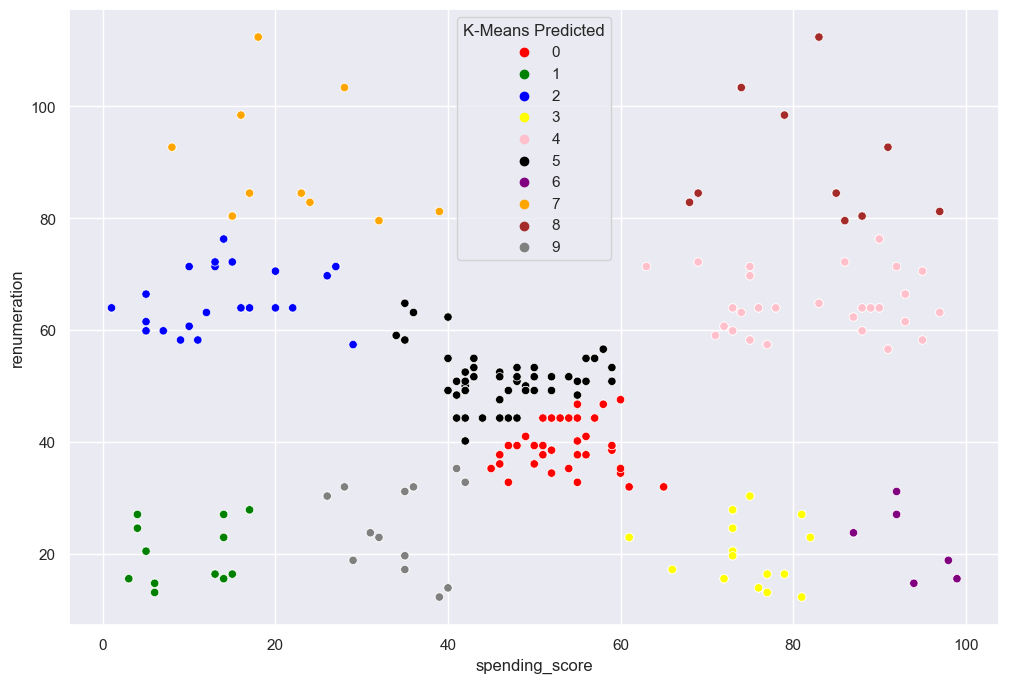

In [89]:
# Create a scatterplot.
sns.scatterplot(x='spending_score', y='renumeration', 
                data=x,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'yellow', 'pink', 'black', 'purple', 'orange', 'brown', 'grey'])

## 5. Fit final model and justify your choice

In [ ]:
# Apply the final model.
# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [ ]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

## 6. Plot and interpret the clusters

In [ ]:
# Visualising the clusters.


# View the DataFrame.


In [ ]:
# Visualising the clusters.



## 7. Discuss: Insights and observations

***Your observations here...***

In [ ]:
# Although there were only 5 education types, it seems that k=5 (five clusters) might give the best results (groups). The five education types are closely related (graduate, postgraduate); therefore, Cluster 0 for both k=4, k=5, k=6 is the largest group. The number of predicted values per class indicates a better distribution for k=5 than k=4.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [613]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
!pip install nltk
import nltk 
import os 
import string
import re
import matplotlib.pyplot as plt

# nltk.download('punkt')
# nltk.download('stopwords')

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
!pip install textblob 
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

# Install vaderSentiment tool.
!pip install vaderSentiment

# Import the necessary class.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Create an object from the class.
sia = SentimentIntensityAnalyzer()

In [614]:
# Load the data set as df3.

df3 = pd.read_csv('reviews.csv')

# View DataFrame.
print(df3.columns)
print(df3.shape)
print(df3.head())
print(df3.tail())

Index(['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product', 'review', 'summary'],
      dtype='object')
(2000, 9)
   gender  age  renumeration  spending_score  loyalty_points education  \
0    Male   18         12.30              39             210  graduate   
1    Male   23         12.30              81             524  graduate   
2  Female   22         13.12               6              40  graduate   
3  Female   25         13.12              77             562  graduate   
4  Female   33         13.94              40             366  graduate   

   product                                             review  \
0      453  When it comes to a DM's screen, the space on t...   
1      466  An Open Letter to GaleForce9*:\n\nYour unpaint...   
2      254  Nice art, nice printing.  Why two panels are f...   
3      263  Amazing buy! Bought it as a gift for our new d...   
4      291  As my review of GF9's previous screens these w...   

   

In [615]:
# Explore data set.
print(df3.dtypes)

gender             object
age                 int64
renumeration      float64
spending_score      int64
loyalty_points      int64
education          object
product             int64
review             object
summary            object
dtype: object


In [616]:
# Keep necessary columns. Drop unnecessary columns.

df3 = df3.drop(columns=['gender', 'age', 'renumeration', 'spending_score', 'loyalty_points',
       'education', 'product'])

# View column names.
print(df3.columns)
# View DataFrame.
print(df3)

Index(['review', 'summary'], dtype='object')
                                                 review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3             

In [617]:
# Determine if there are any missing values.
print(df3.isnull().sum())

review     0
summary    0
dtype: int64


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [618]:
# Review: Change all to lower case and join with a space.

df3

review  \
0     When it comes to a DM's screen, the space on t...   
1     An Open Letter to GaleForce9*:\n\nYour unpaint...   
2     Nice art, nice printing.  Why two panels are f...   
3     Amazing buy! Bought it as a gift for our new d...   
4     As my review of GF9's previous screens these w...   
...                                                 ...   
1995  The perfect word game for mixed ages (with Mom...   
1996  Great game.  Did not think I would like it whe...   
1997  Great game for all.........\nKeeps the mind ni...   
1998                                          fun game!   
1999  This game is fun. A lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [619]:
df3['review'] = df3['review'].astype(str)
df3['review'] = df3.review.str.lower()

In [620]:
df3

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     The fact that 50% of this space is wasted on a...  
1     Another worthless Dungeon Master's screen from...  
2                       pretty, but also pretty useless  
3                                            Five Stars  
4                                            Money trap  
...                                                 ...  
1995     The perfect word game for mixed ages (with Mom  
1996                                          Super fun  
1997                                         Great Game  
1998                                         Four Stars  
1999                                     Love this game  

[2000 rows x 2 columns]

In [621]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].astype(str)
df3['summary'] = df3['summary'].str.lower()
df3

review  \
0     when it comes to a dm's screen, the space on t...   
1     an open letter to galeforce9*:\n\nyour unpaint...   
2     nice art, nice printing.  why two panels are f...   
3     amazing buy! bought it as a gift for our new d...   
4     as my review of gf9's previous screens these w...   
...                                                 ...   
1995  the perfect word game for mixed ages (with mom...   
1996  great game.  did not think i would like it whe...   
1997  great game for all.........\nkeeps the mind ni...   
1998                                          fun game!   
1999  this game is fun. a lot like scrabble without ...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [622]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].apply(lambda x: x.translate( str.maketrans('', '', string.punctuation) ))
df3['review'] = df3['review'].str.replace('\n', ' ')
# View output.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50% of this space is wasted on a...  
1     another worthless dungeon master's screen from...  
2                       pretty, but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995     the perfect word game for mixed ages (with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

In [623]:
# View output.

In [624]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].apply(lambda x: x.translate( str.maketrans('', '', string.punctuation) ))
df3['summary'] = df3['summary'].str.replace('\n', ' ')
# View output.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[2000 rows x 2 columns]

### 2c) Drop duplicates in both columns

In [625]:
# Drop duplicates in both columns.
df3 = df3.drop_duplicates(subset=['review', 'summary'], keep=False)

# View DataFrame.
df3

review  \
0     when it comes to a dms screen the space on the...   
1     an open letter to galeforce9  your unpainted m...   
2     nice art nice printing  why two panels are fil...   
3     amazing buy bought it as a gift for our new dm...   
4     as my review of gf9s previous screens these we...   
...                                                 ...   
1995  the perfect word game for mixed ages with mom ...   
1996  great game  did not think i would like it when...   
1997           great game for all keeps the mind nimble   
1998                                           fun game   
1999  this game is fun a lot like scrabble without a...   

                                                summary  
0     the fact that 50 of this space is wasted on ar...  
1     another worthless dungeon masters screen from ...  
2                        pretty but also pretty useless  
3                                            five stars  
4                                            money trap  
...                                                 ...  
1995      the perfect word game for mixed ages with mom  
1996                                          super fun  
1997                                         great game  
1998                                         four stars  
1999                                     love this game  

[1940 rows x 2 columns]

## 3. Tokenise and create wordclouds

In [626]:
# Create new DataFrame (copy DataFrame).
# review
df3_r = ' '.join(df3['review'])


# View DataFrame.
df3_r

'when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely an open letter to galeforce9  your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i massive swath of the inner panel is wasted on artwork and a bloated overland map which could

In [627]:
# Create new DataFrame (copy DataFrame).
# summary
df3_s = ' '.join(df3['summary'])

# View DataFrame.
df3_s

'the fact that 50 of this space is wasted on art and not terribly informative or needed art  another worthless dungeon masters screen from galeforce9 pretty but also pretty useless five stars money trap five stars best gm screen ever five stars great but could be even better another missed opportunity  not a value add to the product line five stars love the map not a general dm screen very weak game fell completely flat five stars good book buckley was a card mommer very advanced but as good as it gets you better know what youre getting into dont bother the worst value ive ever seen not enough product good product but temporary tattoos were good gift huge hit gorgeous pictures five stars wonderful designs wow great coloring book nice book great pictures perfect well done my relaxation beautiful coloring book the pictures are great ive done one and gave it to a  great buy cant wait to work on this book stained glass perfection four stars so beautiful great pictures very nice five stars 

In [628]:
# Apply tokenisation to both columns.
# review
df3_r_t = word_tokenize(df3_r)



# View DataFrame.
df3_r_t




['when',
 'it',
 'comes',
 'to',
 'a',
 'dms',
 'screen',
 'the',
 'space',
 'on',
 'the',
 'screen',
 'itself',
 'is',
 'at',
 'an',
 'absolute',
 'premium',
 'the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'as',
 'well',
 'makes',
 'it',
 'completely',
 'useless',
 'the',
 'only',
 'reason',
 'that',
 'i',
 'gave',
 'it',
 '2',
 'stars',
 'and',
 'not',
 '1',
 'was',
 'that',
 'technically',
 'speaking',
 'it',
 'can',
 'at',
 'least',
 'still',
 'stand',
 'up',
 'to',
 'block',
 'your',
 'notes',
 'and',
 'dice',
 'rolls',
 'other',
 'than',
 'that',
 'it',
 'drops',
 'the',
 'ball',
 'completely',
 'an',
 'open',
 'letter',
 'to',
 'galeforce9',
 'your',
 'unpainted',
 'miniatures',
 'are',
 'very',
 'not',
 'bad',
 'your',
 'spell',
 'cards',
 'are',
 'great',
 'your',
 'board',
 'games',
 'are',
 'meh',
 'your',
 'dm',
 'screens',
 'however',
 'are',
 'freaking',
 't

In [629]:
# Apply tokenisation to both columns.
# summary

df3_s_t = word_tokenize(df3_s)


# View DataFrame.
df3_s_t



['the',
 'fact',
 'that',
 '50',
 'of',
 'this',
 'space',
 'is',
 'wasted',
 'on',
 'art',
 'and',
 'not',
 'terribly',
 'informative',
 'or',
 'needed',
 'art',
 'another',
 'worthless',
 'dungeon',
 'masters',
 'screen',
 'from',
 'galeforce9',
 'pretty',
 'but',
 'also',
 'pretty',
 'useless',
 'five',
 'stars',
 'money',
 'trap',
 'five',
 'stars',
 'best',
 'gm',
 'screen',
 'ever',
 'five',
 'stars',
 'great',
 'but',
 'could',
 'be',
 'even',
 'better',
 'another',
 'missed',
 'opportunity',
 'not',
 'a',
 'value',
 'add',
 'to',
 'the',
 'product',
 'line',
 'five',
 'stars',
 'love',
 'the',
 'map',
 'not',
 'a',
 'general',
 'dm',
 'screen',
 'very',
 'weak',
 'game',
 'fell',
 'completely',
 'flat',
 'five',
 'stars',
 'good',
 'book',
 'buckley',
 'was',
 'a',
 'card',
 'mommer',
 'very',
 'advanced',
 'but',
 'as',
 'good',
 'as',
 'it',
 'gets',
 'you',
 'better',
 'know',
 'what',
 'youre',
 'getting',
 'into',
 'dont',
 'bother',
 'the',
 'worst',
 'value',
 'ive',
 'e

In [630]:
# Review: Create a word cloud.

# Generate the text
review_text = ' '.join(df3_r_t)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(review_text)



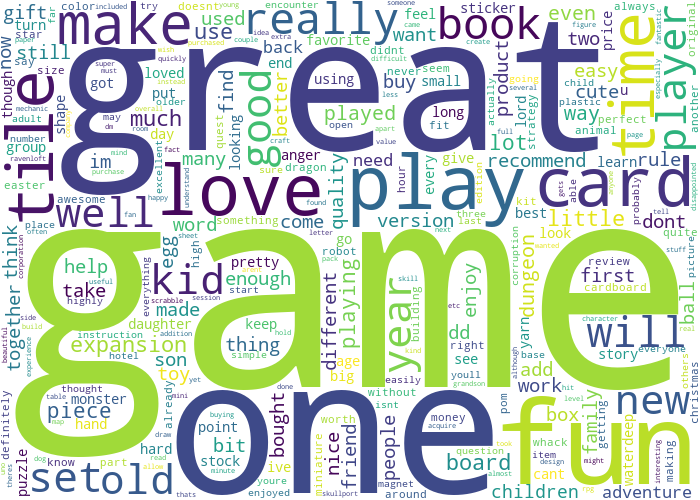

In [631]:
# Review: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

In [632]:
# Summary: Create a word cloud.
# Generate the text
summary_text = ' '.join(df3_s_t)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(summary_text)


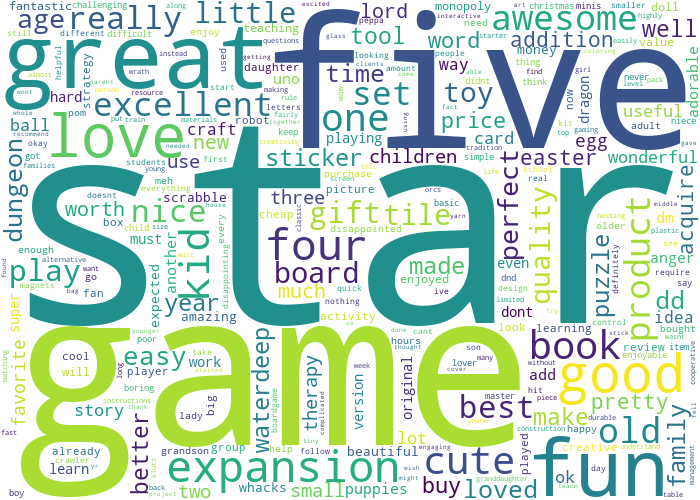

In [633]:
# Summary: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [634]:
# Determine the frequency distribution.
# Review

# Create a frequency distribution object.
freq_dist_of_words_review = FreqDist(df3_r_t)

# Show the five most common elements in the data set.
freq_dist_of_words_review.most_common(15)

[('the', 5450),
 ('and', 3232),
 ('to', 3160),
 ('a', 3159),
 ('of', 2488),
 ('i', 2089),
 ('it', 2081),
 ('is', 1782),
 ('this', 1776),
 ('game', 1663),
 ('for', 1545),
 ('with', 1265),
 ('you', 1177),
 ('in', 1148),
 ('that', 1067)]

In [635]:
# Summary

# Create a frequency distribution object.
freq_dist_of_words_summary = FreqDist(df3_s_t)

# Show the five most common elements in the data set.
freq_dist_of_words_summary.most_common(15)

[('stars', 406),
 ('five', 321),
 ('game', 319),
 ('great', 295),
 ('the', 261),
 ('a', 240),
 ('for', 232),
 ('fun', 218),
 ('to', 192),
 ('and', 168),
 ('it', 150),
 ('of', 139),
 ('this', 135),
 ('is', 103),
 ('love', 93)]

### 4b) Remove alphanumeric characters and stopwords

In [636]:
# Delete all the alpanum.


In [637]:
# Remove all the stopwords
# Removing stopwords
df3_r_t_clean = [word for word in df3_r_t if word not in stopwords]
# Removing stopwords
df3_s_t_clean = [word for word in df3_s_t if word not in stopwords]


### 4c) Create wordcloud without stopwords

In [638]:
# Create a wordcloud without stop words.
# Review

# Generate the text
review_text_c = ' '.join(df3_r_t_clean)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(review_text_c)

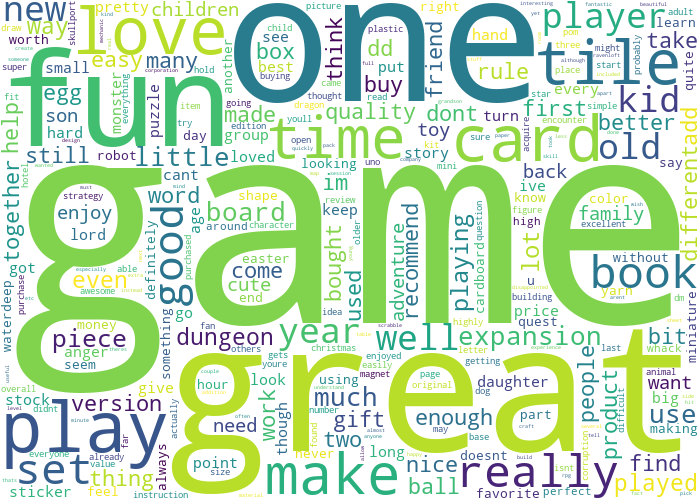

In [639]:
# Plot the wordcloud image.
# Review: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

In [640]:
# Summary: Create a word cloud.
# Generate the text
summary_text_c = ' '.join(df3_s_t_clean)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=300, contour_width=3,contour_color='steelblue', width=700, height=500, scale=1, max_font_size=500, collocations=False)
# Generate a word cloud
wordcloud.generate(summary_text_c)


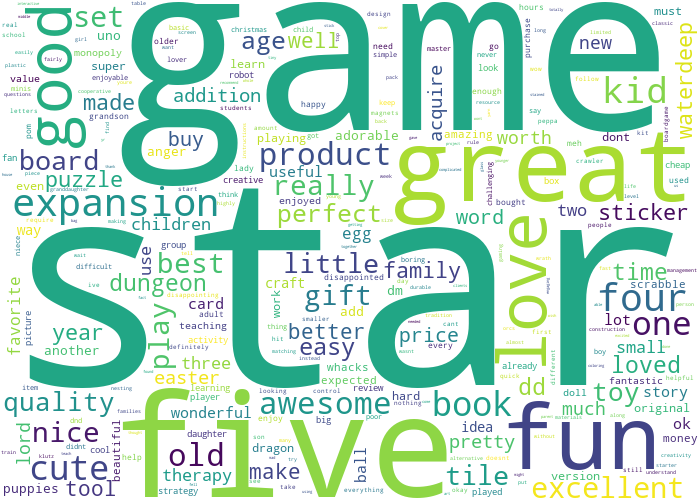

In [641]:
# Plot the wordcloud image.
# Summary: Plot the WordCloud image.
# Visualize the word cloud
wordcloud.to_image()

### 4d) Identify 15 most common words and polarity

In [642]:
# Determine the 15 most common words.

# Review

# Create a frequency distribution object.
freq_dist_of_words_review_c = FreqDist(df3_r_t_clean)

# Show the five most common elements in the data set.
freq_dist_of_words_review_c.most_common(15)


[('game', 1663),
 ('great', 574),
 ('fun', 551),
 ('one', 530),
 ('play', 502),
 ('like', 414),
 ('love', 320),
 ('really', 319),
 ('get', 319),
 ('cards', 301),
 ('tiles', 297),
 ('time', 291),
 ('good', 286),
 ('would', 280),
 ('book', 273)]

In [643]:
# Summary

# Create a frequency distribution object.
freq_dist_of_words_summary_c = FreqDist(df3_s_t_clean)

# Show the five most common elements in the data set.
freq_dist_of_words_summary_c.most_common(15)


[('stars', 406),
 ('five', 321),
 ('game', 319),
 ('great', 295),
 ('fun', 218),
 ('love', 93),
 ('good', 92),
 ('four', 58),
 ('like', 54),
 ('expansion', 52),
 ('kids', 50),
 ('cute', 45),
 ('book', 43),
 ('one', 38),
 ('awesome', 36)]

## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [675]:
# Provided function.
sample_reviews = df3
sample_summary = df3

# review
def generate_polarity_r(review):
# '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(review).sentiment.polarity

# summary
def generate_polarity_s(summary):
# '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(summary).sentiment.polarity



In [676]:
# Determine polarity of both columns.
# View output.

# review
sample_reviews['polarity'] = sample_reviews.review.apply(generate_polarity_r)
sample_reviews.head()






review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9  your unpainted m...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity  
0  the fact that 50 of this space is wasted on ar... -0.036111  
1  another worthless dungeon masters screen from ...  0.035952  
2                     pretty but also pretty useless  0.116640  
3                                         five stars  0.578788  
4                                         money trap -0.316667

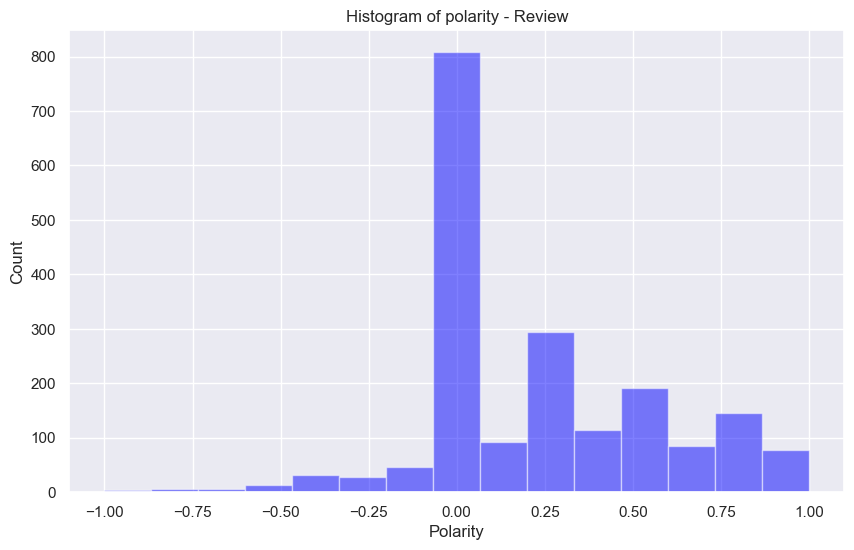

AttributeError: 'DataFrame' object has no attribute 'sentiment'

<Figure size 1000x600 with 0 Axes>

In [685]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_reviews.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity - Review')
plt.show();
# Histogram of sentiment score
# Histogram of sentiment score
num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_reviews.sentiment, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of sentiment - Review')
plt.show();

In [678]:
# summary
sample_summary['polarity'] = sample_summary.summary.apply(generate_polarity_s)
sample_summary.head()

review  \
0  when it comes to a dms screen the space on the...   
1  an open letter to galeforce9  your unpainted m...   
2  nice art nice printing  why two panels are fil...   
3  amazing buy bought it as a gift for our new dm...   
4  as my review of gf9s previous screens these we...   

                                             summary  polarity  
0  the fact that 50 of this space is wasted on ar...      0.15  
1  another worthless dungeon masters screen from ...     -0.80  
2                     pretty but also pretty useless      0.00  
3                                         five stars      0.00  
4                                         money trap      0.00

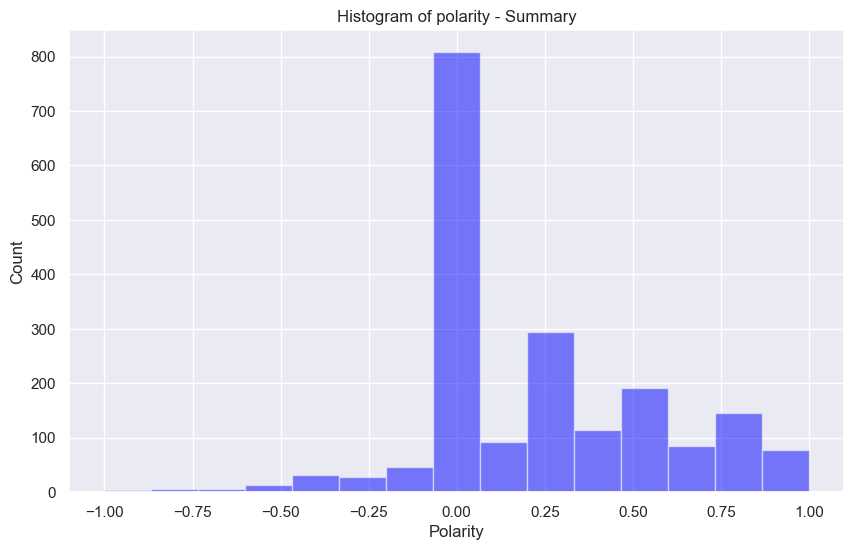

In [683]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(sample_summary.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity - Summary')
plt.show();


In [703]:
# Histogram of sentiment score

# Apply sentiment analysis.
for sentence in df3['review']:
 score = sia.polarity_scores(sentence)['compound']
 print(f'The sentiment value of the sentence :"{sentence}" is : {score}')
 # If you insert this line of code, you will have a line break between the outputs.
 print("="*50)

num_bins = 15
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df3.review.score, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Histogram of sentiment - Summary')
plt.show();

The sentiment value of the sentence :"when it comes to a dms screen the space on the screen itself is at an absolute premium the fact that 50 of this space is wasted on art and not terribly informative or needed art as well makes it completely useless the only reason that i gave it 2 stars and not 1 was that technically speaking it can at least still stand up to block your notes and dice rolls other than that it drops the ball completely" is : -0.6333
The sentiment value of the sentence :"an open letter to galeforce9  your unpainted miniatures are very not bad your spell cards are great your board games are meh your dm screens however are freaking terrible im still waiting for a single screen that isnt polluted with pointless artwork where useful referenceable tables should be once again youve created a single use screen that is only useful when running the storm kings thunder adventure even despite the fact that its geared to that adventure path its usefulness negligible at best i mas

The sentiment value of the sentence :"what a fabulous idea  i tripped across this product just the other day and had to have it for our family  im always trying to incorporate god and his message into our daily lives and with easter coming up what a great way to learn the easter story and share the easter story  our daughter is almost 7 years old and i know shell love these nesting eggs  its a perfect visual to go along with the story  as mentioned by the creator the nesting eggs are hard to get apart at first but when instructions are followed getting them apart is easy  no twisting but gentle rocking back and forth helped me get them apart  then i practiced a few times  the more you use them take apart put back together the easier it becomes  i cannot wait to start this new tradition in a few weeks  pretty sure well be getting the nativity scene and christmas story from this creator too" is : 0.982
The sentiment value of the sentence :"precious and perfect way to read through the sto

The sentiment value of the sentence :"i enjoy playing games and i have only played this one a couple times  however i can see that there is more than one strategy that can lead to success in this game  i am glad to place this one in the rotation of games  the game arrived quickly and as expected so i will happily deal with wizards of the coast again in the future now if only i can get more free time to relax  play games" is : 0.9773
The sentiment value of the sentence :"for a company that was able to roll out magic the gathering trading card game with all the strategy packed into those cards this game is lacking and misses the expectations that i had set for wizards an interesting game to help to explain to young adults about how mergers and acquisitions might work at a very basic level in this world ma being a large section of open job opportunities in the world at this point but very basic one track strategy and lacking in overall fun honestly" is : 0.91
The sentiment value of the se

The sentiment value of the sentence :"this is a great way to get minis and an awesome dungeon crawl system to boot it has inspired me to get into the world of dnd more thoroughly and i have been having a blast painting the minis as well the dungeon cards are great for assembling into just about any sort of underground encounter you could imagine" is : 0.9559
The sentiment value of the sentence :"good pricegame is fun cant really complain" is : 0.8189
The sentiment value of the sentence :"my husband bought this so we as a family could play a cool game together well its a hit in our house im glad he bought it quality is very nice and my kids love the figurines that come along with it" is : 0.9441
The sentiment value of the sentence :"many hours of fun have been had this is good for those nerdy friends who just want to get together throw back a couple and start up a game" is : 0.8555
The sentiment value of the sentence :"i bought this game as an impulse buy at barnes and noble and i could

The sentiment value of the sentence :"i have a wife and kids  i dont have time to be apart of a gaming group thus i really dont play dd type games i also live in a rural area where finding people to game with is difficult especially for people who like something more than party games furthermore i have been really tired of video games and wanted to play some board games as a break from all that  i stopped playing dd when i was a teenager because some idiot would ultimately become the strongest playercharacter thus intimidating other players and then turning on everyone either killing them or making them his slave during game play i eventually quit because i was so unhappy with these confrontations no matter who the group was these negative effects seem to occur  recently i have been quite interested in the new dd board games that have been produced by wizards of the coast after watching many reviews on youtube i decided to take a leap and buy the wrath of ashardalon i like the idea the

The sentiment value of the sentence :"its amazing actually wrath of ashardalon has taken the basic themes and source material of the new edition of dungeons and dragons and distilled it into something better not only is this a must own gem of a board game id even say its the best thing wizards of the coast has released in years highest recommendation  no dungeons and dragons experience necessary to enjoy this game also this is fully playable as a solo experience" is : 0.9169
The sentiment value of the sentence :"disclaimer bought this from a local store paid list value but supporting local game stores helps keep them in business and its a rough market to keep a gaming store running also i do not own nor have i playednbspa datahookproductlinklinked classalinknormal hrefdungeonsdragonscastleravenloftboardgamedp0786955570refcmcrarpdrvwtxtieutf8dungeons  dragons castle ravenloft board gamea the first dd adventures board game regardless  dungeons  dragons wrath of ashardalon board game woa 

The sentiment value of the sentence :"lords of waterdeep was awesome and scoundrels of skullport makes it even bigger better and crazier like the original game on steroids you get two expansions in one undermountain and skullport both feature 3 new lord cards 3 new basic building locations each on a separate small game board a ton of new buyable buildings plus a huge amount of new quest and intrigue cards skullport includes a corruption mechanic that penalizes your endgame points by the number of corruption tokens blue skulls you have vs how many remain on the included corruption track also on a small game board you gain corruption by using the awesome new buildings or completing some of the crazy new quests corruption is easy to gain but hard to get rid of ask any politician lol but the game includes a number of ways to get rid of it a bit at a time such as through using certain buildings completing certain quests or playing certain intrigue cards corruption management is vital dont w

The sentiment value of the sentence :"as a dad of two boys im always on the lookout for activities for us to do together  something we can all enjoy and equally get into  we built a da vinci catapult a siege tower did some exploring with microscopes geocaching etc with varying degrees of interest in one of the two boys  dont get me wrong we all had fun but it was more for one or the other depending on the activity  my older son since the day he could has loved to talk  he loves to tell stories about things hes done things hed like to do or things hes watched  if he can make a story out of something he will  my younger son has since i can remember loved to play board games  there are ones he likes more than others but i dont think weve played a game he didnt like  i recently became aware of a cardboard game by a company out of the uk named cubicle7  the game is called hobbit tales from the green dragon inn and it looked very interesting  cubicle7 also makes a rpg that takes place in the

The sentiment value of the sentence :"the first thing anyone who sees this for the first time is going to say is what is it  youll quickly come to the conclusion thats a question much easier to ask than to answer i guess the answer really isits what ever you want it to be   i went to my synonym finder and here are just a few of the names i came up with they are all names we have usedmost arent even in the dictionaryand any one of them could be used to describe this thing doohickiedojiggergizmowhachamacallitthingumajigflumadiddlewidget thingumabobare all pretty good namesbut the inventor chooses to call it a ball of whacksso i guess thats what it is  the pictures and descriptions describe it as well as anything but what to do with it is the question it comes with a small book of 96 pages that describes how and why roger von oech invented it and what you can do with it he describes the very interesting mathematics that is the basis of the shapes of the pieces or whacksto mathematiciansth

AttributeError: 'Series' object has no attribute 'score'

<Figure size 1000x600 with 0 Axes>

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [ ]:
# Top 20 negative reviews.


# View output.


In [ ]:
# Top 20 negative summaries.


# View output.


In [ ]:
# Top 20 positive reviews.


# View output.


In [ ]:
# Top 20 positive summaries.


# View output.


## 7. Discuss: Insights and observations

***Your observations here...***

# 